<a href="https://colab.research.google.com/github/Nhung-Nguyen86/DataScience/blob/main/Predicting_House_Prices_Using_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices Using Multiple Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
warnings.filterwarnings('ignore')

# Data Exploration and Cleaning:

In [ ]:
#import train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# Check the correlation of Features with Target Variable

In [ ]:
numeric_cols = train.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_cols.corr()["SalePrice"]  # Calculate the correlation matrix for numeric columns

Text(0.5, 1.0, 'Correlation coefficients w.r.t. Sale Price')

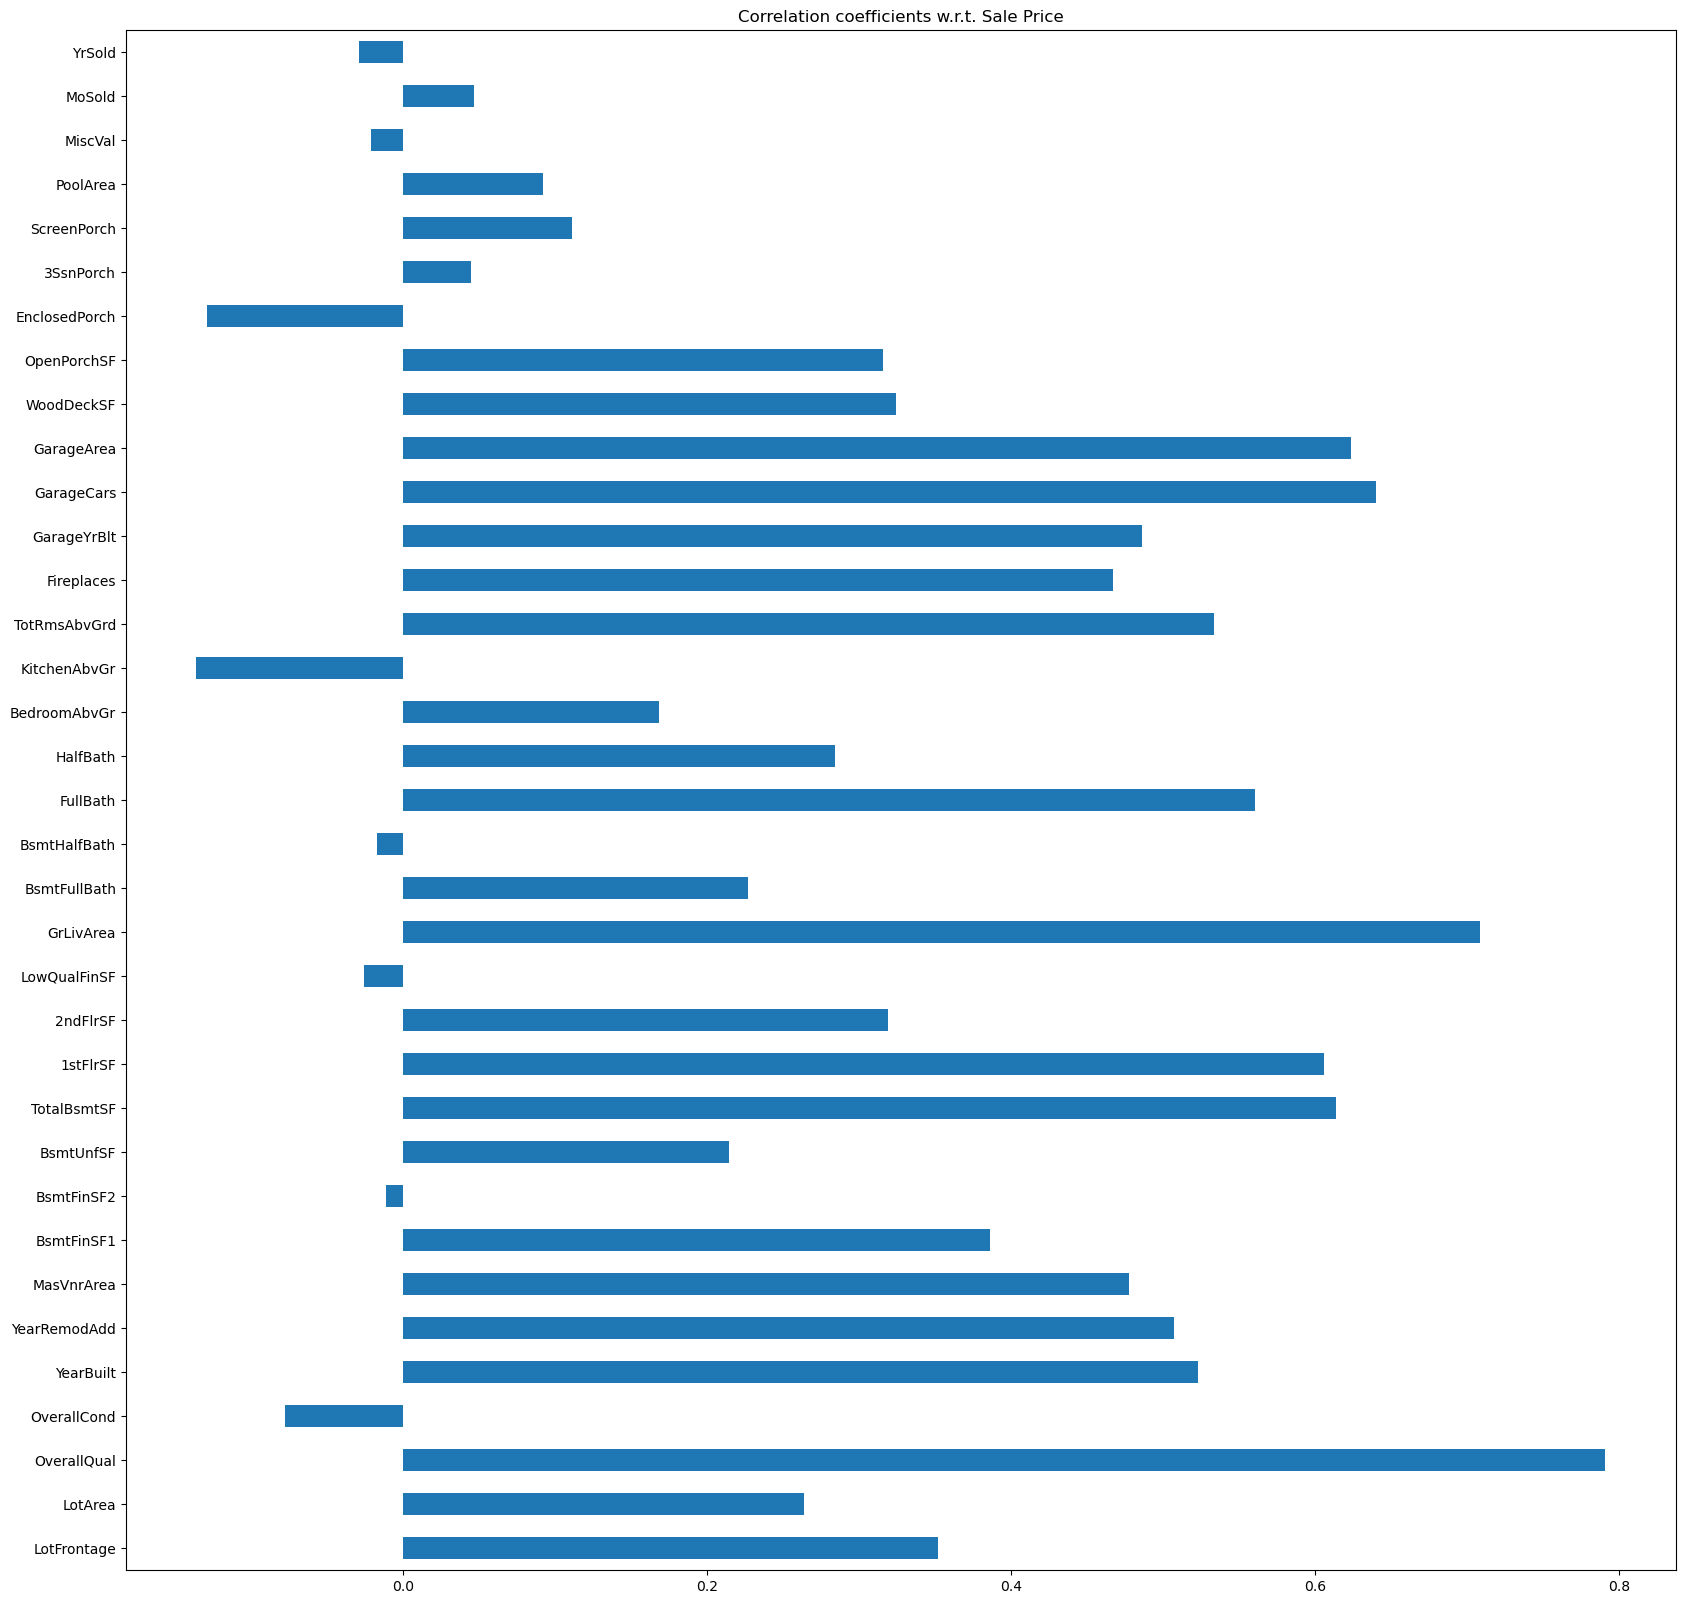

In [ ]:
plt.figure(figsize=(20,20))
corr = corr[1:-1] # removing 1st (SalePrice) and last (Id) row from dataframe
corr.plot(kind='barh') # using pandas plot
plt.title('Correlation coefficients w.r.t. Sale Price')

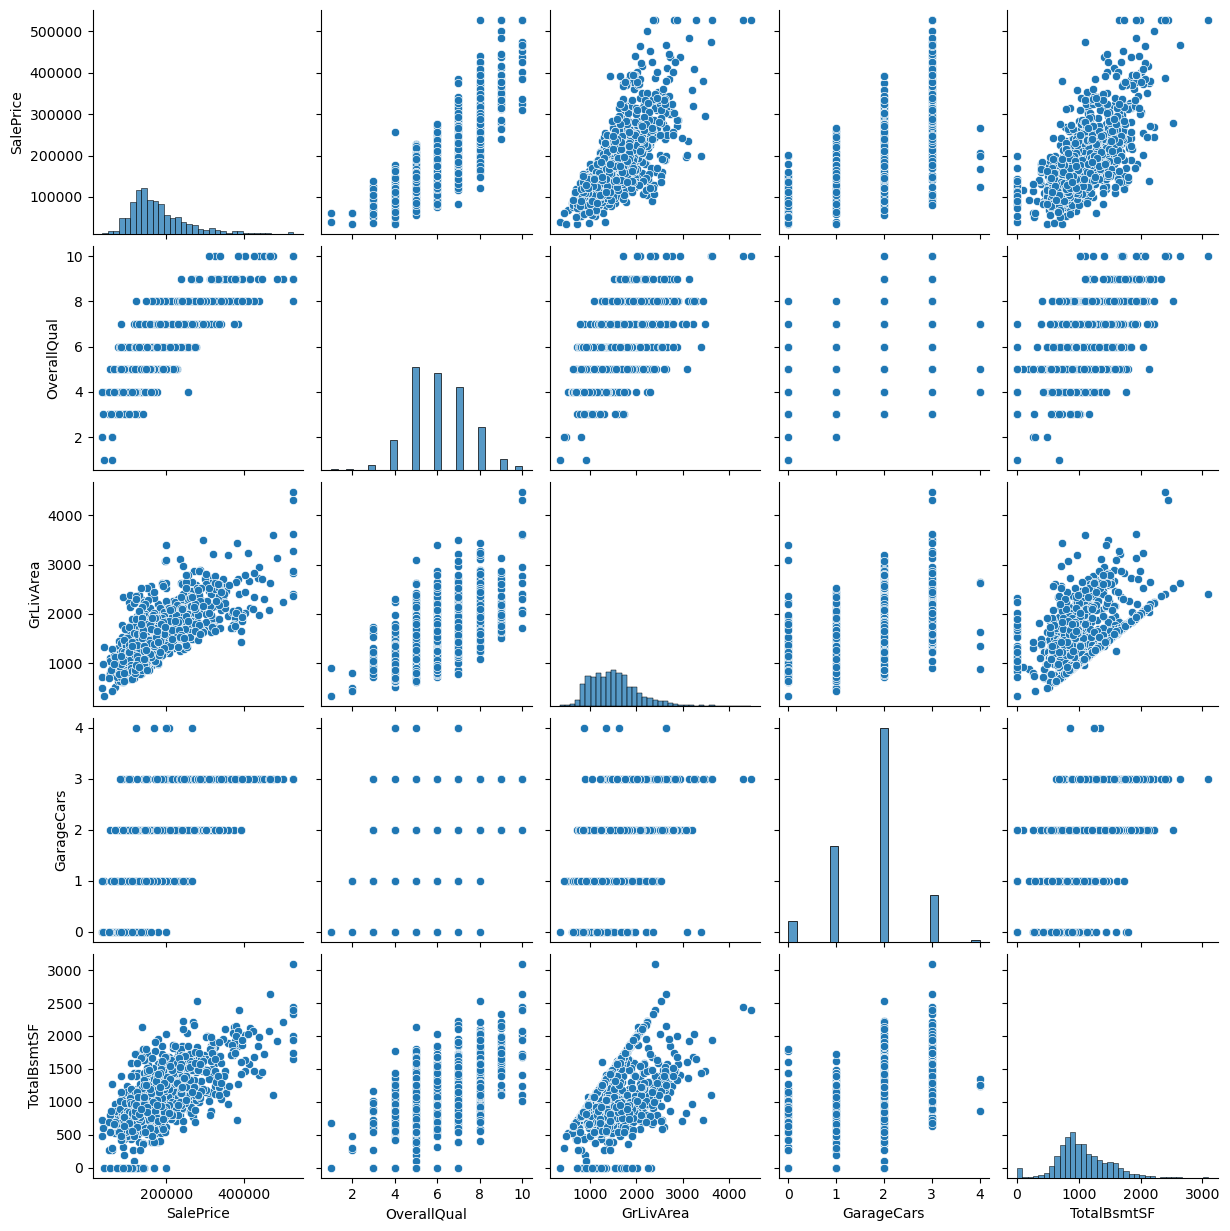

In [ ]:
#We choose 4 most high correlation features with the SalePrice
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train[cols], size = 2.5)

# Remove outliers

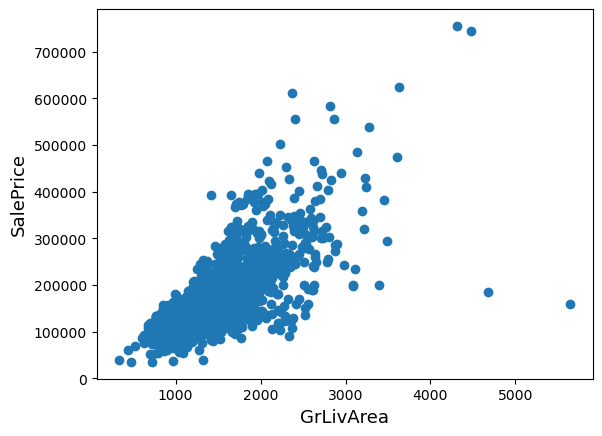

In [ ]:
#1. Explore data with GrLivArea and SalePrice
fig, ax1 = plt.subplots()
ax1.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
#We can see at the bottom right there are two properties that have extremely large GrLivArea but are priced very low. These values are oultliers, so we can safely remove them.

In [ ]:
train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
#Remove Outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

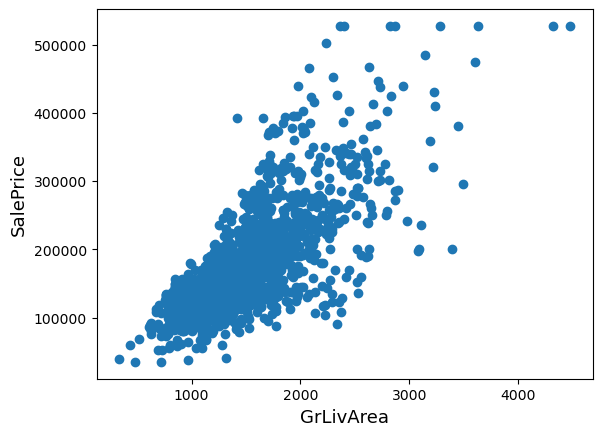

In [ ]:
#Let's look at the scatter plot after remove outliers
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

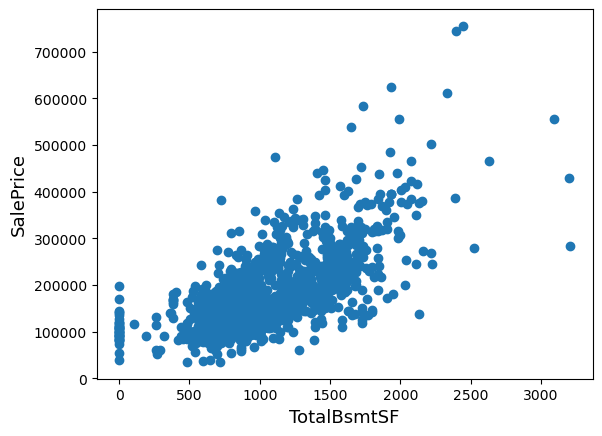

In [ ]:
#2. Explore date with TotalBsmtSF and SalePrice
fig, ax1 = plt.subplots()
ax1.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [ ]:
train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<500000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
496,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [ ]:
#Remove Outliers
train = train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<500000)].index)
#We can see at the bottom right there are two properties that have extremely high TotalBsmtSF but are priced low.
#These values are oultliers, so we can safely remove them.

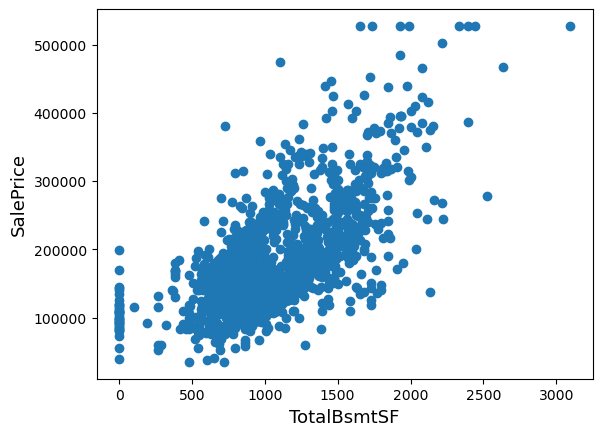

In [ ]:
#Let's look at the scatter plot after removing the outliers
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

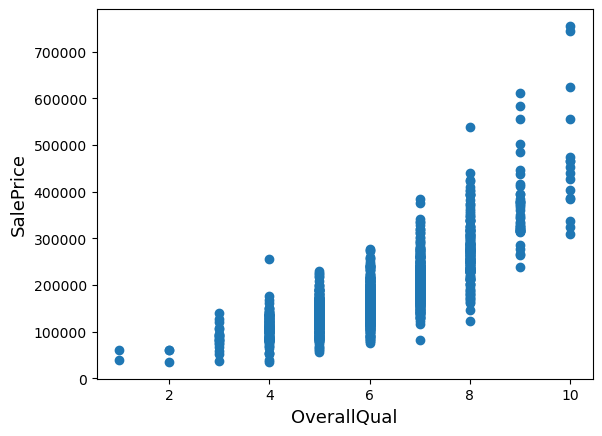

In [ ]:
#3. Explore date with OverallQual and SalePrice
fig, ax1 = plt.subplots()
ax1.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

In [ ]:
#There is no outliers in this features

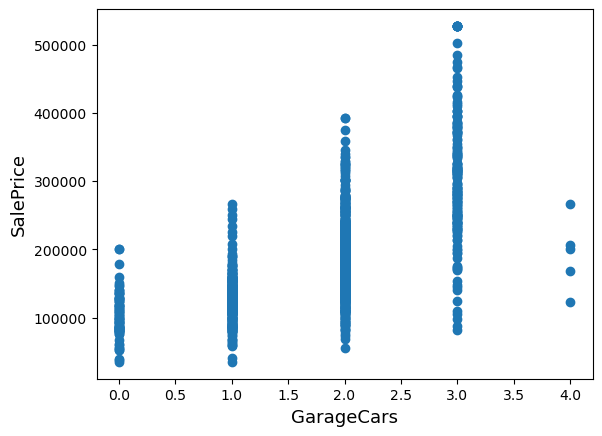

In [ ]:
#4. Explore date with GarageCars and SalePrice
fig, ax1 = plt.subplots()
ax1.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

In [ ]:
train[(train['GarageCars']>3.5) & (train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [ ]:
#We will not consider these as outliers as the 4 GaragesCars house is not very popular and the house prices are lower than the 3 GarageCars house, but the prices are not extremely low.

# Target Variable

**SalePrice** is the variable we need to predict. So let's do some analysis on this variable first.

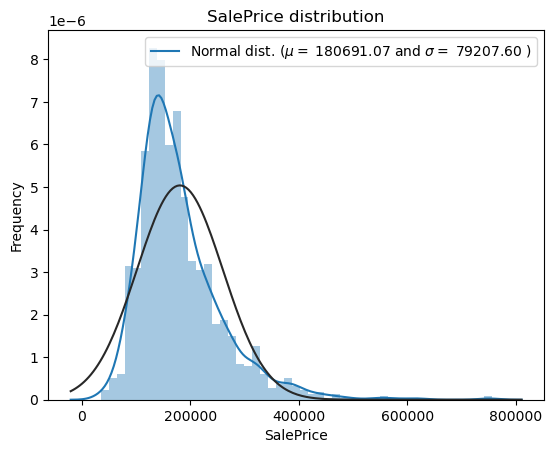

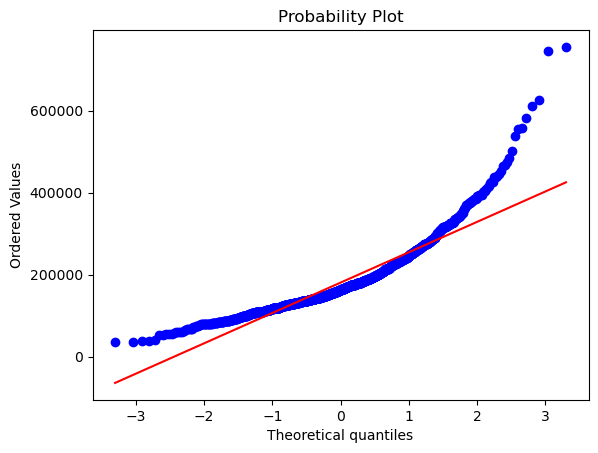

In [ ]:
sns.distplot(train['SalePrice'] , fit=norm);

# Find mu and sigma
(mu, sigma) = norm.fit(train['SalePrice'])


# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.  As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

 # Log-transformation of the target variable

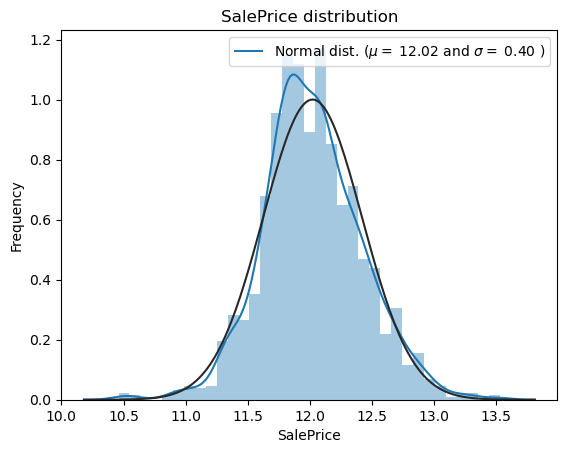

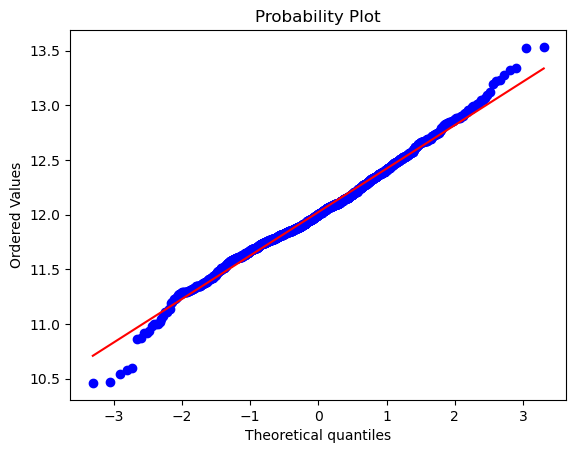

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log(train["SalePrice"])

#Check the new distribution
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


The skew seems now corrected and the data appears more normally distributed.

# Features engineering

In [ ]:
#Concatenate the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


In [ ]:
#Check missing ratio of the data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.691252
MiscFeature,96.397942
Alley,93.207547
Fence,80.411664
MasVnrType,60.548885
FireplaceQu,48.713551
LotFrontage,16.638079
GarageFinish,5.454545
GarageQual,5.454545
GarageCond,5.454545


In [ ]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


Skewness: 0.119215
Kurtosis: 0.815557


In [ ]:
y_train = train.SalePrice.values

In [ ]:
train.drop(columns=['SalePrice'], inplace=True)

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [ ]:
all_data.shape

(2915, 79)

In [ ]:
missing_values = all_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_percentage = (missing_values / len(all_data)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_summary

,Missing Values,Percentage
PoolQC,2906,99.691252
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2344,80.411664
MasVnrType,1765,60.548885
FireplaceQu,1420,48.713551
LotFrontage,485,16.638079
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545


In [ ]:
print(missing_summary.head())
print(missing_summary.shape)

             Missing Values  Percentage
PoolQC                 2906   99.691252
MiscFeature            2810   96.397942
Alley                  2717   93.207547
Fence                  2344   80.411664
MasVnrType             1765   60.548885
(34, 2)


In [ ]:
col_fil_None = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass']

for col in col_fil_None:
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
col_fil_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea']
for col in col_fil_zero:
    all_data[col] = all_data[col].fillna(0)

In [ ]:
col_fil_mode = ['MSZoning','Utilities','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for col in col_fil_mode:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [ ]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [ ]:
missing_values = all_data.isnull().sum()

In [ ]:
missing_values

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [ ]:
categorical_columns = [col for col in all_data if any(isinstance(val, (str)) for val in all_data[col])]

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(all_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
all_data = pd.concat([all_data[numerical_columns], encoded_df], axis=1)

<Axes: >

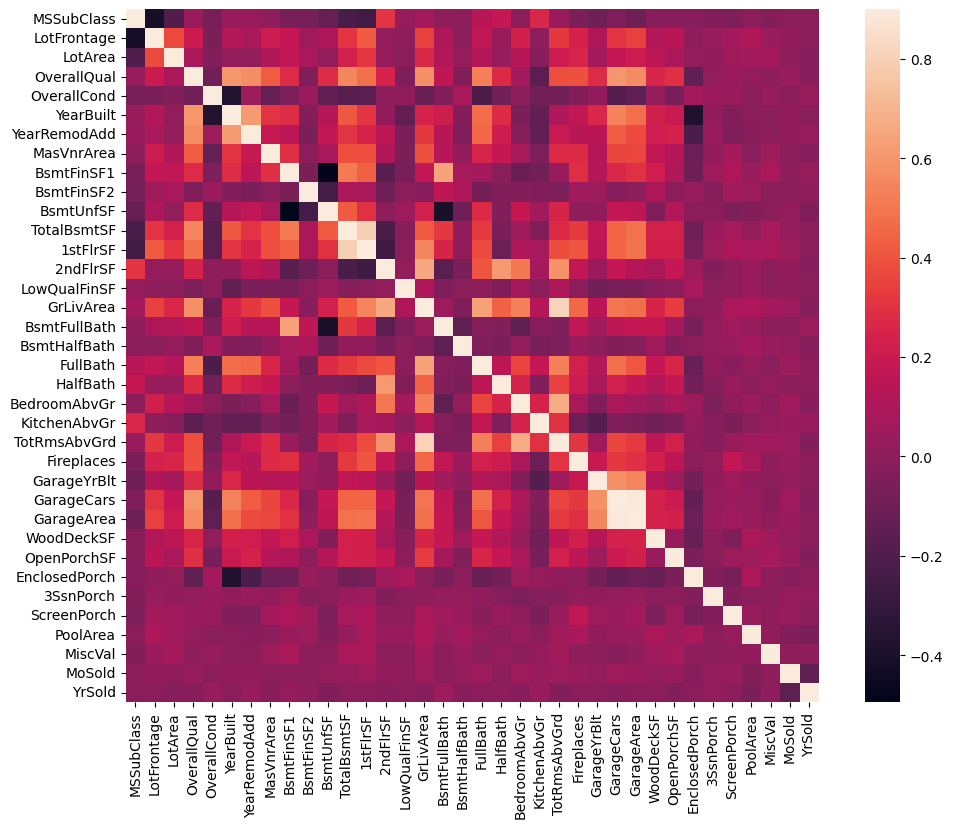

In [ ]:
corrmat = all_data[numerical_columns].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Modeling

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(train, y_train, train_size=.80, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1164, 301), (292, 301), (1164,), (292,))

In [ ]:
correlations = np.abs(np.corrcoef(xtrain.T, ytrain)[0, :-1])

sorted_indices = np.argsort(correlations)[::-1]

threshold = 0.1
selected_features_corr = sorted_indices[correlations[sorted_indices] >= threshold]

print("Selected features using Correlation Analysis:")
print(selected_features_corr)

Selected features using Correlation Analysis:
[  0 106 110 107 113 109   1 116  39  13  21  66  12  11  40  74  76  45
  37 184  64 117  77  19  44  18 247 186 108 118 122 289 120 177 152  98
 137  85  10   2 222 223 280 178  49  69]


In [ ]:
selected_xtrain = xtrain.iloc[:, selected_features_corr]
selected_xtrain.shape

(1164, 46)

In [ ]:
selected_xtrain.columns

Index(['MSSubClass', 'BldgType_1Fam', 'BldgType_TwnhsE', 'BldgType_2fmCon',
       'HouseStyle_1Story', 'BldgType_Twnhs', 'LotFrontage',
       'HouseStyle_2Story', 'MSZoning_RL', '2ndFlrSF', 'KitchenAbvGr',
       'Neighborhood_BrDale', '1stFlrSF', 'TotalBsmtSF', 'MSZoning_RM',
       'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Alley_Pave',
       'MSZoning_FV', 'BsmtQual_Gd', 'Neighborhood_Blmngtn',
       'HouseStyle_SFoyer', 'Neighborhood_NPkVill', 'HalfBath', 'Alley_None',
       'FullBath', 'GarageType_Attchd', 'BsmtQual_TA', 'BldgType_Duplex',
       'HouseStyle_SLvl', 'RoofStyle_Hip', 'SaleType_ConLD', 'RoofStyle_Gable',
       'Foundation_CBlock', 'Exterior2nd_CmentBd', 'Condition2_Artery',
       'Exterior1st_CemntBd', 'Neighborhood_Somerst', 'BsmtUnfSF', 'LotArea',
       'CentralAir_N', 'CentralAir_Y', 'Fence_None', 'Foundation_PConc',
       'LotShape_Reg', 'Neighborhood_CollgCr'],
      dtype='object')

In [ ]:
selected_xtest = xtest.iloc[:, selected_features_corr]
selected_xtest.shape

(292, 46)

In [ ]:
selected_xtrain

,MSSubClass,BldgType_1Fam,BldgType_TwnhsE,BldgType_2fmCon,HouseStyle_1Story,BldgType_Twnhs,LotFrontage,HouseStyle_2Story,MSZoning_RL,2ndFlrSF,...,Exterior1st_CemntBd,Neighborhood_Somerst,BsmtUnfSF,LotArea,CentralAir_N,CentralAir_Y,Fence_None,Foundation_PConc,LotShape_Reg,Neighborhood_CollgCr
254,20,1.0,0.0,0.0,1.0,0.0,70.0,0.0,1.0,0,...,0.0,0.0,392.0,8400,0.0,1.0,1.0,0.0,1.0,0.0
1063,60,1.0,0.0,0.0,0.0,0.0,59.0,1.0,1.0,772,...,0.0,0.0,799.0,7837,0.0,1.0,1.0,1.0,0.0,0.0
636,120,0.0,1.0,0.0,1.0,0.0,53.0,0.0,1.0,0,...,0.0,0.0,366.0,3982,0.0,1.0,1.0,1.0,1.0,0.0
1289,70,1.0,0.0,0.0,0.0,0.0,60.0,1.0,0.0,994,...,0.0,0.0,994.0,6600,1.0,0.0,1.0,0.0,1.0,0.0
514,80,1.0,0.0,0.0,0.0,0.0,80.0,0.0,1.0,741,...,0.0,0.0,689.0,10448,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,50,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,567,...,0.0,0.0,0.0,6000,0.0,1.0,1.0,0.0,1.0,0.0
1130,60,1.0,0.0,0.0,0.0,0.0,80.0,1.0,1.0,878,...,0.0,0.0,544.0,9828,0.0,1.0,1.0,1.0,0.0,0.0
1294,180,0.0,1.0,0.0,0.0,0.0,35.0,0.0,0.0,0,...,0.0,0.0,0.0,3675,0.0,1.0,1.0,1.0,1.0,0.0
860,20,1.0,0.0,0.0,1.0,0.0,70.0,0.0,1.0,0,...,0.0,0.0,0.0,7931,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
len(ytrain)

1164

In [ ]:
def evaluate_model(model, X, y):
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    cv_r2 = cross_val_score(model, X, y, scoring="r2", cv=5)
    return cv_rmse.mean(), cv_rmse.std(), cv_r2.mean(), cv_r2.std()

models = {
    "ElasticNet": make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005)),
    "Ridge": make_pipeline(RobustScaler(), Ridge(alpha=0.0005)),
    "Lasso": make_pipeline(RobustScaler(), Lasso(alpha=0.0005)),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Linear Regression": make_pipeline(RobustScaler(), LinearRegression()),
    "Polynomial Regression (Degree 3)": make_pipeline(RobustScaler(), PolynomialFeatures(degree=3), LinearRegression())
}

for name, model in models.items():
    rmse_mean, rmse_std, r2_mean, r2_std = evaluate_model(model, selected_xtrain, ytrain)
    print(f"{name}:")
    print(f"  RMSE: {rmse_mean:.4f} ± {rmse_std:.4f}")
    print(f"  R^2: {r2_mean:.4f} ± {r2_std:.4f}\n")

ElasticNet:
  RMSE: 0.1634 ± 0.0046
  R^2: 0.8271 ± 0.0148

Ridge:
  RMSE: 0.1645 ± 0.0065
  R^2: 0.8248 ± 0.0158

Lasso:
  RMSE: 0.1632 ± 0.0044
  R^2: 0.8274 ± 0.0150

Random Forest:
  RMSE: 0.1686 ± 0.0048
  R^2: 0.8167 ± 0.0132

Linear Regression:
  RMSE: 0.1645 ± 0.0065
  R^2: 0.8248 ± 0.0158

Polynomial Regression (Degree 3):
  RMSE: 31.9599 ± 34.7167
  R^2: -15336.4584 ± 24630.2876



In [ ]:
#In conclusion: Random Forest is the best model for this dataset.